# Metrics

## Classification

## imbalanced data

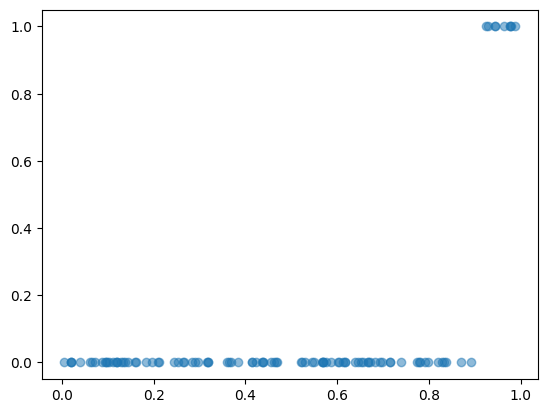

In [33]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
np.random.seed(0)
x = np.random.uniform(0, 1, size=n)
y = np.random.binomial(n=1, p=x)
y[x < 0.9] = 0

plt.scatter(x, y, alpha=.5)

In [34]:
y.mean()

0.09

In [38]:
X = x.reshape(-1, 1)

(array([31., 13., 10., 13., 10.,  5.,  7.,  2.,  2.,  7.]),
 array([0.0217468 , 0.04332273, 0.06489867, 0.08647461, 0.10805055,
        0.12962649, 0.15120243, 0.17277836, 0.1943543 , 0.21593024,
        0.23750618]),
 <BarContainer object of 10 artists>)

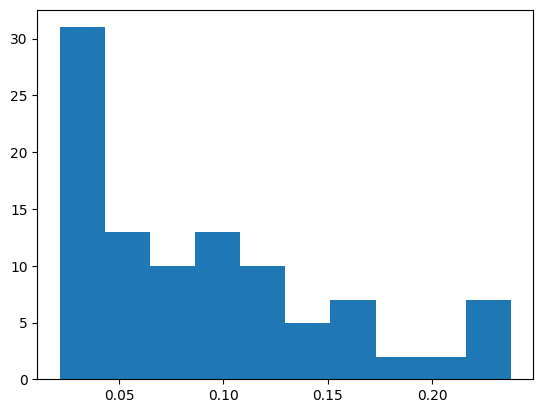

In [41]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)
p_pred = clf.predict_proba(X)[:, 1]

plt.hist(p_pred)

In [45]:
np.median(p_pred)

0.07147041581159291

In [46]:
np.mean(p_pred)

0.090000036374747